In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

In [3]:
from tensorflow.keras.models import load_model
vgg_model = load_model('final_assignment_2_resources/my_model.h5')

In [4]:
video_capture = cv2.VideoCapture(1)

In [5]:
def detect_bounding_box(vid):
    gray_image = cv2.cvtColor(vid, cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray_image, 1.1, 5, minSize=(40, 40))
    crop_image = []
    for (x, y, w, h) in faces:
        cv2.rectangle(vid, (x, y), (x + w, y + h), (0, 255, 0), 4)
        crop_image = vid[y:y+h, x:x+w]
        resize_img = cv2.resize(crop_image, (227, 227))
        resize_img = cv2.cvtColor(resize_img, cv2.COLOR_BGR2RGB)
        predictions  = vgg_model.predict(np.array([resize_img]), verbose = 0)
        binary_prediction = (predictions > 0.5).astype(int)
        if binary_prediction == 0:
            cv2.putText(vid, "Mask", (x, y+h), 1, 1.0, (255, 0, 0), 2, cv2.LINE_AA)
        else:
            cv2.putText(vid, "No Mask", (x, y+h), 1, 1.0, (255, 0, 0), 2, cv2.LINE_AA)
        
    return faces

In [6]:
while True:

    result, video_frame = video_capture.read()  # read frames from the video
    if result is False:
        break  # terminate the loop if the frame is not read successfully

    faces = detect_bounding_box(
        video_frame
    )  # apply the function we created to the video frame

    cv2.imshow(
        "My Face Detection Project", video_frame
    )  # display the processed frame in a window named "My Face Detection Project"

    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

video_capture.release()
cv2.destroyAllWindows()

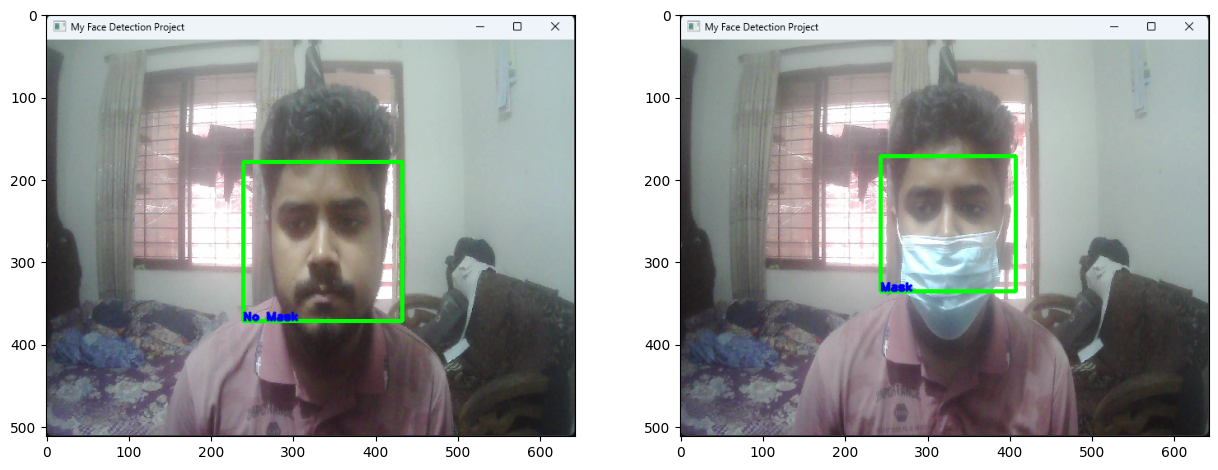

In [10]:
no_mask_img = cv2.imread('final_assignment_2_resources/snap/No mask.png')
with_mask_img = cv2.imread('final_assignment_2_resources/snap/With mask.png')
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(no_mask_img, cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(with_mask_img, cv2.COLOR_BGR2RGB))
plt.show()